# A570 HW #3
### Armaan Goyal

In [2]:
#basic packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy
from IPython.display import Image

#specific tasks and routines
from matplotlib.offsetbox import AnchoredText
from scipy.integrate import quad
from scipy.optimize import least_squares
from matplotlib.ticker import MaxNLocator

#plotting and LaTeX
from astropy.visualization import astropy_mpl_style
plt.style.use("ggplot")
mpl.rcParams["figure.dpi"]=200
%config InlineBackend.figure_format = "svg"
plt.rcParams["text.usetex"] =True

## Problem 1

Define functions to generate points in shell and calculate acceleration and potential per unit mass at a given point.

In [135]:
def gen_points_3D(N, r1, r2): # generate uniform shell of N points
    coords = np.random.uniform(-r2, r2, (10*N, 3)) # make box of 10*N points
    rs = np.sqrt(np.sum(coords*coords, axis=1))
    mask = (rs >= r1) & (rs <= r2) # take only points between r1 and r2
    xs, ys, zs = coords[mask][:,0][:N], coords[mask][:,1][:N], coords[mask][:,2][:N]
    return xs, ys, zs

def point_calc_3D(x, y, z, N, r1, r2, M, verbose = True): # calculate accel and potential
    r = np.sqrt(x*x + y*y + z*z)
    xs, ys, zs = gen_points_3D(N, r1, r2) # generate shell
    m = M/N # set mass of individual stars
    x_shift = xs - x
    y_shift = ys - y # transform coordinate system so chosen point is at center
    z_shift = zs - z
    r_shift = np.sqrt(x_shift*x_shift + y_shift*y_shift + z_shift*z_shift)
    a = -1*m/(r_shift*r_shift) # calculate accel
    ax = a*(x_shift/r_shift)
    ay = a*(y_shift/r_shift) # Cartesian components of accel
    az = a*(z_shift/r_shift)
    net_ax, net_ay, net_az = np.sum(ax), np.sum(ay), np.sum(az) # net components
    net_a = np.sqrt(net_ax*net_ax + net_ay*net_ay + net_az*net_az) # net accel
    net_pot = np.sum(-1*m/r_shift)
    if r < r1:
        real_a = 0
        err = np.abs(net_a) # if inside shell, accel should be 0 
    if r > r2:
        real_a = M/(x*x + y*y + z*z)
        err = np.abs(real_a - net_a)/real_a # if outside shell, should be point mass potential
    if verbose:
        print("For uniform spherical shell with M = %d, N = %d, r1 = %.2f, r2 = %.2f"%(int(M), N, r1, r2))
        print("For point mass at (%.2f, %.2f, %.2f):"%(x, y, z))
        print("---------------------------------------")
        print("N-body Net Potential (per unit mass): %.5g"%(net_pot))
        print("N-body Net Acceleration: %.5g"%(net_a))
        print("Analytical Net Acceleration: %.5g"%(real_a))
        if r < r1:
            print("Estimate yields absolute error of %.2g"%(err))
        if r > r2:
            print("Estimate yields percent error of %.2g"%(100*err))
    return net_a, net_pot, err

We now run the calculations for $r_{1}$ = 1, $r_{2}$ = 2, $M=100$, and $N=10^{6}$ for 4 sample points outside the shell and 4 sample points inside the shell. The results will be compared to the expected analytical values.

In [302]:
r1, r2 = 1, 2
M = 100
N = 1000000

point_calc_3D(3, 3, 3, N, r1, r2, M, verbose = True) # outside shell
print()
point_calc_3D(10, 4, 5, N, r1, r2, M, verbose = True)
print()
point_calc_3D(6, 5, 8, N, r1, r2, M, verbose = True)
print()
point_calc_3D(100, 100, 100, N, r1, r2, M, verbose = True)

For uniform spherical shell with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (3.00, 3.00, 3.00):
---------------------------------------
N-body Net Potential (per unit mass): -19.246
N-body Net Acceleration: 3.7039
Analytical Net Acceleration: 3.7037
Estimate yields percent error of 0.0066

For uniform spherical shell with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (10.00, 4.00, 5.00):
---------------------------------------
N-body Net Potential (per unit mass): -8.4214
N-body Net Acceleration: 0.70921
Analytical Net Acceleration: 0.70922
Estimate yields percent error of 0.0018

For uniform spherical shell with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (6.00, 5.00, 8.00):
---------------------------------------
N-body Net Potential (per unit mass): -8.9437
N-body Net Acceleration: 0.79989
Analytical Net Acceleration: 0.8
Estimate yields percent error of 0.014

For uniform spherical shell with M = 100, N = 1000000, r1 = 1.00, r2 = 2.

(0.0033333565965208817, -0.5773522562660405, 6.9789562644542716e-06)

In [303]:
r1, r2 = 1, 2
M = 100
N = 1000000

point_calc_3D(.3, .3, .3, N, r1, r2, M, verbose = True) # inside shell
print()
point_calc_3D(.2, .4, .5, N, r1, r2, M, verbose = True)
print()
point_calc_3D(.15, -.22, .38, N, r1, r2, M, verbose = True)
print()
point_calc_3D(0, 0, 0, N, r1, r2, M, verbose = True)

For uniform spherical shell with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (0.30, 0.30, 0.30):
---------------------------------------
N-body Net Potential (per unit mass): -64.268
N-body Net Acceleration: 0.052167
Analytical Net Acceleration: 0
Estimate yields absolute error of 0.052

For uniform spherical shell with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (0.20, 0.40, 0.50):
---------------------------------------
N-body Net Potential (per unit mass): -64.278
N-body Net Acceleration: 0.1107
Analytical Net Acceleration: 0
Estimate yields absolute error of 0.11

For uniform spherical shell with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (0.15, -0.22, 0.38):
---------------------------------------
N-body Net Potential (per unit mass): -64.243
N-body Net Acceleration: 0.080692
Analytical Net Acceleration: 0
Estimate yields absolute error of 0.081

For uniform spherical shell with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For poin

(0.02902902941530691, -64.28163706474982, 0.02902902941530691)

We will now plot the acceleration errors (as compared to the expected analytical values) as a function of $N$ for a fixed point outside the shell. The same will be done for a single given point inside the shell. 

In [136]:
x, y, z = 3, 3, 3 # outside shell
r1, r2 = 1, 2
M = 100

err_list = []
N_list = np.arange(2, 8, 1) # vary N
for i in N_list:
    xs, ys, zs = gen_points_3D(int(10**i), 1, 2)
    a, pot, a_err = point_calc_3D(x, y, z, 10**i, r1, r2, M, verbose = False)
    err_list.append(a_err)

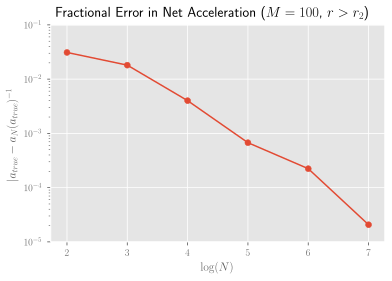

In [137]:
fig = plt.figure()
plt.plot(N_list, err_list)
plt.scatter(N_list, err_list)
plt.yscale('log')
plt.ylim(1e-5, 1e-1)
plt.xlabel("$\log(N)$")
plt.ylabel("$|a_{true} - a_{N}(a_{true})^{-1}$")
plt.title("Fractional Error in Net Acceleration ($M=100$, $r > r_{2}$)")
plt.show()

In [138]:
x, y, z = 0, 0, 0 # inside shell
r1, r2 = 1, 2
M = 100

err_list = []
N_list = np.arange(2, 8, 1)
for i in N_list:
    xs, ys, zs = gen_points_3D(int(10**i), 1, 2)
    a, pot, a_err = point_calc_3D(x, y, z, 10**i, r1, r2, M, verbose = False)
    err_list.append(a_err)

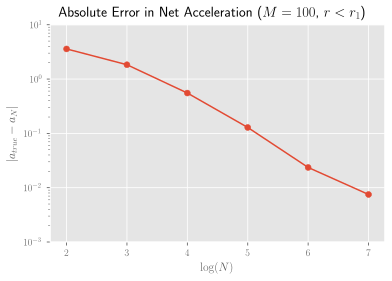

In [139]:
fig = plt.figure()
plt.plot(N_list, err_list)
plt.scatter(N_list, err_list)
plt.yscale('log')
plt.ylim(1e-3, 10)
plt.xlabel("$\log(N)$")
plt.ylabel("$|a_{true} - a_{N}|$")
plt.title("Absolute Error in Net Acceleration ($M=100$, $r < r_{1}$)")
fig.savefig("3dshellin.png", dpi = 200)
plt.show()

We see that acceleration values given by the N-body code approach the analytical solution as $N$ increases.

## Problem 2

The structure of this problem will follow that of the last, only that the shell is now a 2D ring. 

In [140]:
def gen_points_2D(N, r1, r2): # same structure as gen_points_3D
    coords = np.random.uniform(-r2, r2, (10*N, 2))
    rs = np.sqrt(np.sum(coords*coords, axis=1))
    mask = (rs >= r1) & (rs <= r2)
    xs, ys = coords[mask][:,0][:N], coords[mask][:,1][:N]
    return xs, ys

def point_calc_2D(x, y, N, r1, r2, M, verbose = True): # same structure as point_calc_3D
    r = np.sqrt(x*x + y*y)
    xs, ys = gen_points_2D(N, r1, r2)
    m = M/N
    x_shift = xs - x
    y_shift = ys - y
    r_shift = np.sqrt(x_shift*x_shift + y_shift*y_shift)
    a = -1*m/(r_shift*r_shift)
    ax = a*(x_shift/r_shift)
    ay = a*(y_shift/r_shift)
    net_ax, net_ay = np.sum(ax), np.sum(ay)
    net_a = np.sqrt(net_ax*net_ax + net_ay*net_ay)
    net_pot = np.sum(-m/r_shift)
    if r > r2:
        real_a = M/(x*x + y*y)
    if verbose:
        print("For uniform ring with M = %d, N = %d, r1 = %.2f, r2 = %.2f"%(int(M), N, r1, r2))
        print("For point mass at (%.2f, %.2f):"%(x, y))
        print("---------------------------------------")
        print("N-body Net Potential: %.5f"%(net_pot))
        print("N-body Net Acceleration: %.5f"%(net_a))
        if r > r2:
            print("Acceleration assuming total point mass at center: %.5f"%(real_a))
    return net_a, net_pot

In [315]:
r1, r2 = 1, 2
M = 100
N = 1000000

point_calc_2D(3, 3, N, r1, r2, M, verbose = True) # outside ring
print()
point_calc_2D(5, 4, N, r1, r2, M, verbose = True)
print()
point_calc_2D(6, -5, N, r1, r2, M, verbose = True)
print()
point_calc_2D(100, 100, N, r1, r2, M, verbose = True)

For uniform ring with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (3.00, 3.00):
---------------------------------------
N-body Net Potential: -24.46879
N-body Net Acceleration: 6.23479
Acceleration assuming total point mass at center: 5.55556

For uniform ring with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (5.00, 4.00):
---------------------------------------
N-body Net Potential: -15.86436
N-body Net Acceleration: 2.55800
Acceleration assuming total point mass at center: 2.43902

For uniform ring with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (6.00, -5.00):
---------------------------------------
N-body Net Potential: -12.93726
N-body Net Acceleration: 1.69171
Acceleration assuming total point mass at center: 1.63934

For uniform ring with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (100.00, 100.00):
---------------------------------------
N-body Net Potential: -0.70712
N-body Net Acceleration: 0.00500
Acceleratio

(0.005000305614400962, -0.7071173050399181)

We see that for points outside the shell, the N-body net acceleration does not agree with the analytical solution for a single point of equivalent total mass located at the center of the distribution. This is to be expected, as we know that Newton's shell theorems do not apply in a two-dimensional space. However, we see that for points that are very distant from the ring, the imprint of the mass distribution is generally lost and the acceleration is nearly identical to that from a single point source of equivalent mass.  

In [316]:
r1, r2 = 1, 2
M = 100
N = 1000000

point_calc_2D(.3, .3, N, r1, r2, M, verbose = True) # inside ring
print()
point_calc_2D(.2, .4, N, r1, r2, M, verbose = True)
print()
point_calc_2D(.15, -.22, N, r1, r2, M, verbose = True)
print()
point_calc_2D(0, 0, N, r1, r2, M, verbose = True)

For uniform ring with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (0.30, 0.30):
---------------------------------------
N-body Net Potential: -68.25295
N-body Net Acceleration: 8.01886

For uniform ring with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (0.20, 0.40):
---------------------------------------
N-body Net Potential: -68.45409
N-body Net Acceleration: 8.63276

For uniform ring with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (0.15, -0.22):
---------------------------------------
N-body Net Potential: -67.26273
N-body Net Acceleration: 4.62322

For uniform ring with M = 100, N = 1000000, r1 = 1.00, r2 = 2.00
For point mass at (0.00, 0.00):
---------------------------------------
N-body Net Potential: -66.65909
N-body Net Acceleration: 0.06732


(0.06731611619770389, -66.65908534522254)

The acceleration for points inside the ring is nonzero, which is to be expected once again given that we do not expect Newton's shell theorems to hold in 2D.

In [141]:
x, y = 3, 3 # outside shell
r1, r2 = 1, 2
M = 100

a_list = []
pot_list = []

N_list = np.arange(2, 8, 1) # vary N
for i in N_list:
    xs, ys = gen_points_2D(int(10**i), 1, 2)
    a, pot = point_calc_2D(x, y, 10**i, r1, r2, M, verbose = False)
    a_list.append(a)
    pot_list.append(pot)

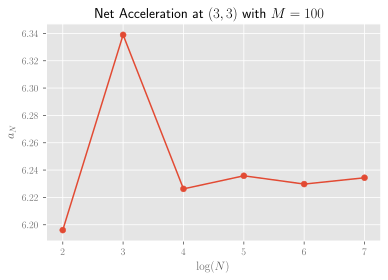

In [142]:
fig = plt.figure()
plt.plot(N_list, a_list)
plt.scatter(N_list, a_list)
plt.xlabel("$\log(N)$")
plt.ylabel("$a_{N}$")
plt.title("Net Acceleration at $(3, 3)$ with $M = 100$")
plt.show()

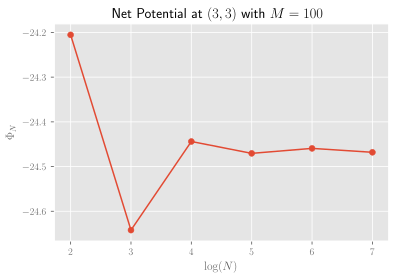

In [143]:
fig = plt.figure()
plt.plot(N_list, pot_list)
plt.scatter(N_list, pot_list)
plt.xlabel("$\log(N)$")
plt.ylabel("$\Phi_{N}$")
plt.title("Net Potential at $(3, 3)$ with $M = 100$")
plt.show()

In [147]:
x, y = .3, .3 # inside shell
r1, r2 = 1, 2
M = 100

a_list = []
pot_list = []

N_list = np.arange(2, 8, 1) # vary N
for i in N_list:
    xs, ys = gen_points_2D(int(10**i), 1, 2)
    a, pot = point_calc_2D(x, y, 10**i, r1, r2, M, verbose = False)
    a_list.append(a)
    pot_list.append(pot)

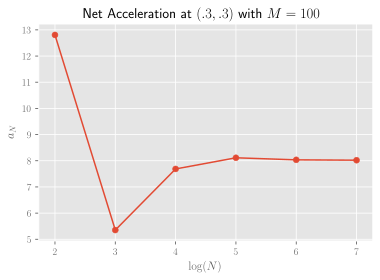

In [149]:
fig = plt.figure()
plt.plot(N_list, a_list)
plt.scatter(N_list, a_list)
plt.xlabel("$\log(N)$")
plt.ylabel("$a_{N}$")
plt.title("Net Acceleration at $(.3, .3)$ with $M = 100$")
plt.show()

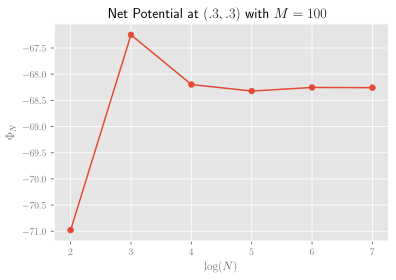

In [148]:
fig = plt.figure()
plt.plot(N_list, pot_list)
plt.scatter(N_list, pot_list)
plt.xlabel("$\log(N)$")
plt.ylabel("$\Phi_{N}$")
plt.title("Net Potential at $(.3, .3)$ with $M = 100$")
plt.show()

We once again see general convergence for both acceleration and potential as $N$ increases.

## Problem 3

Consider $M(R) = 2\pi\Sigma_{0}R_{d} \left[1 - e^{-R/R_{d}}(1 + R/R_{d}) \right]$. The determination of the density profile $\rho(r)$ and the potential $\Phi(r)$ for a spherical system with this total mass are detailed in the attached document.

For a 3D system with this mass distribution:
$v_{c}^{2} = GM/r = (2\pi G \Sigma_{0}r_{d}/r) \left[1 - e^{-r/r_{d}}(1 + r/r_{d})\right]$

For a 2D system with this mass distribution, we find from BT 2008:
$v_{c}^{2} = 4\pi G \Sigma_{0}R_{d}y^{2}[I_{0}(y)K_{0}(y) - I_{1}(y)K_{1}(y)]$ with $y = R/2R_{d}$

We plot the two circular velocity profiles setting $r_{d} = R_{d} = 1$ and normalizing to $\sqrt{2 \pi G \Sigma_{0}}$:

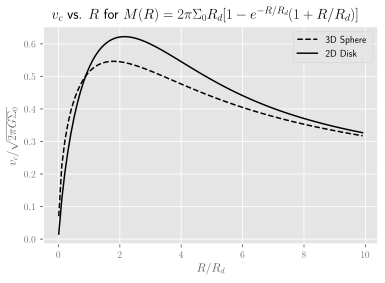

In [150]:
from scipy.special import iv #import Bessel functions
from scipy.special import kv

def vc_3D(r): # 3D dist
    return np.sqrt((1-np.exp(-r)*(1 + r))/r)

def vc_2D(R): # 2D dist
    bessel_term = iv(0, R/2)*kv(0, R/2) - iv(1, R/2)*kv(1, R/2)
    coeff = 2*(R*R/4)
    return np.sqrt(coeff*bessel_term)

fig = plt.figure()
rs = np.arange(.01, 10, .1)
plt.plot(rs, vc_3D(rs), color = "black", ls = "--", label = "3D Sphere")
plt.plot(rs, vc_2D(rs), color = "black", label = "2D Disk")
plt.legend()
plt.xlabel("$R/R_{d}$")
plt.ylabel("$v_{c}/\sqrt{2 \pi G \Sigma_{0}}$")
plt.title("$v_{c}$ vs. $R$ for $M(R) = 2\pi\Sigma_{0}R_{d} [1 - e^{-R/R_{d}}(1 + R/R_{d})]$")
plt.show()

## Problem 4

We note that $\Phi(r) = \Omega^{2}r^{2}/2$ yields $d^{2}x_{i}/dt^{2} = -\Omega^{2}x_{i}$ for $x_{i} = (x, y, z)$. We solve these Cartesian equations of motion, calculate the energy from the Hamiltonian $E = H = \Phi + (v_{x}^{2} + v_{y}^{2} + v_{z}^{2})/2$, and determine the angular momenta with $L_{x} = y\dot{z} - z\dot{y}$, $L_{y} = z\dot{x} - x\dot{z}$, $L_{z} = x\dot{y} - y\dot{x}$, $L = \sqrt{L_{x}^{2} + L_{y}^{2} + L_{z}^{2}}$. We plot the resulting orbit (in various 2D planes), the deviation of the energy from its mean value, and the angular momenta below.

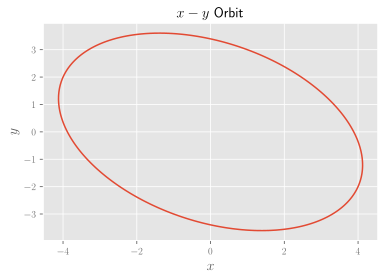

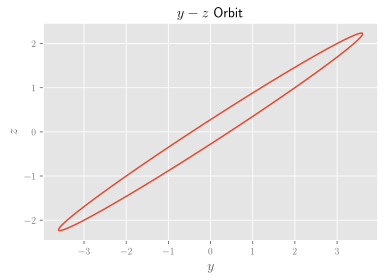

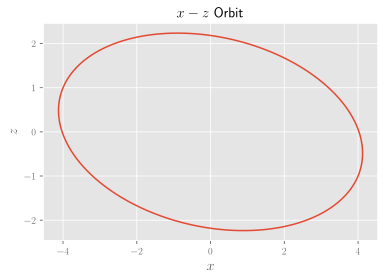

In [151]:
def func(U, phi, L, om): # make derivative vector
    x, xp = U[0], U[1] # initial contidtions x and dx/dt
    xpp = -1*om*om*x
    return [xp, xpp] # return dx/dt and d2x/dt2

L, om = 1, 1 # set constants to 1

t = np.arange(0, 50, .01) # make t vector, solve ODE in x, y, and z
xvec = odeint(func, [-4, 1], t, args=(L, om)) 
yvec = odeint(func, [2, 3], t, args=(L, om))
zvec = odeint(func, [1, 2], t, args=(L, om))

x, xp = xvec[:,0], xvec[:,1] # get spatial coords
y, yp = yvec[:,0], yvec[:,1]
z, zp = zvec[:,0], zvec[:,1]

Lx = y*zp - z*yp # angular momenta
Ly = z*xp - x*zp
Lz = x*yp - y*xp
L = np.sqrt(Lx*Lx + Ly*Ly + Lz*Lz)

fig = plt.figure()
plt.plot(x, y)
plt.title("$x-y$ Orbit")
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$y$", fontsize = 14)
plt.show()

fig = plt.figure()
plt.plot(y, z)
plt.title("$y-z$ Orbit")
plt.xlabel("$y$", fontsize = 14)
plt.ylabel("$z$", fontsize = 14)
plt.show()

fig = plt.figure()
plt.plot(x, z)
plt.title("$x-z$ Orbit")
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$z$", fontsize = 14)
plt.show()

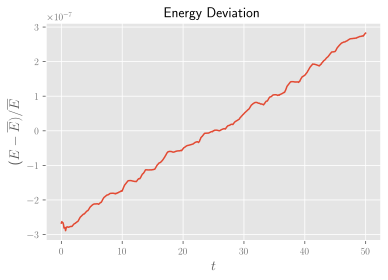

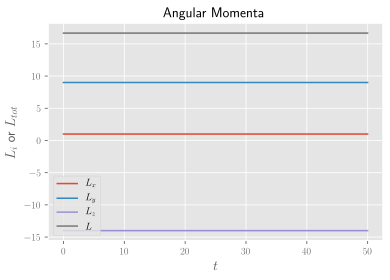

In [153]:
def sph_pot(x, y, z, om): # spherical harmonic potential
    r_sq = x*x + y*y + z*z
    return .5*om*om*r_sq

fig = plt.figure()
pot = sph_pot(x, y, z, om)
E = pot + .5*(xp*xp + yp*yp + zp*zp) # energy from Hamiltonian
E_mean = np.mean(E) # mean E 
plt.plot(t, (E-E_mean)/E_mean) # deviation
plt.ylabel("($E - \overline{E})/\overline{E}$", fontsize = 14)
plt.xlabel("$t$", fontsize = 14)
plt.title("Energy Deviation")
plt.show()

fig=plt.figure()
plt.plot(t, Lx, label = "$L_{x}$")
plt.plot(t, Ly,label = "$L_{y}$")
plt.plot(t, Lz, label = "$L_{z}$")
plt.plot(t, L, label = "$L$")
plt.ylabel("$L_{i}$ or $L_{tot}$", fontsize = 14)
plt.xlabel("$t$", fontsize = 14)
plt.title("Angular Momenta")
plt.legend()
plt.show()

We see that the total energy and all angular momenta are generally conserved from the numerical routine. We plot orbits (x vs. y) for different initial conditions as well:

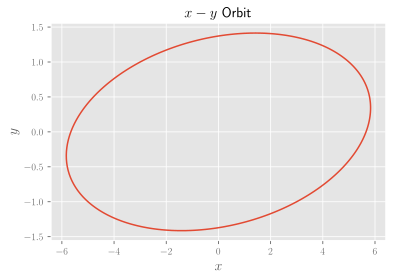

In [154]:
xvec = odeint(func, [-3, 5], t, args=(L, om)) # different initial conds
yvec = odeint(func, [1, 1], t, args=(L, om))
zvec = odeint(func, [-4, 6], t, args=(L, om))

x, xp = xvec[:,0], xvec[:,1] # get spatial coords
y, yp = yvec[:,0], yvec[:,1]
z, zp = zvec[:,0], zvec[:,1]

fig = plt.figure()
plt.plot(x, y)
plt.title("$x-y$ Orbit")
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$y$", fontsize = 14)
plt.show()

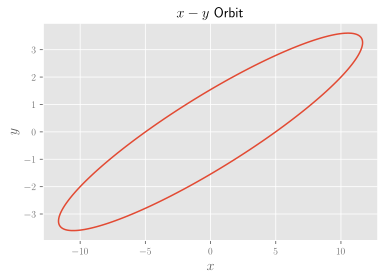

In [155]:
xvec = odeint(func, [-6, 10], t, args=(L, om)) # different initial conds
yvec = odeint(func, [-3, 2], t, args=(L, om))
zvec = odeint(func, [2, 1], t, args=(L, om))

x, xp = xvec[:,0], xvec[:,1] # get spatial coords
y, yp = yvec[:,0], yvec[:,1]
z, zp = zvec[:,0], zvec[:,1]

fig = plt.figure()
plt.plot(x, y)
plt.title("$x-y$ Orbit")
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$y$", fontsize = 14)
plt.show()

We see agreement with the analytical expectation of  [$x = X\cos{(\Omega t + \epsilon_{x})}$, $y = Y\cos{(\Omega t + \epsilon_{y})}$, $x = Z\cos{(\Omega t + \epsilon_{z})}$ ], which yields ellipses centered at the locus of attraction.

## Problem 5

For the axisymmetric potential $\Phi_{eff} = (v_{0}^{2}/2)$ln$(R^{2} + z^{2}/q^{2}) + L_{z}^{2}/2R^{2}$, we solve the equations of motion $d^{2}R/dt^{2} = -\partial \Phi_{eff}^{2}/\partial R$ and $d^{2}z/dt^{2} = -\partial \Phi_{eff}^{2}/\partial z$ and calculate the energy from the Hamiltonian $E = H = \Phi + (\dot{R}^{2} + \dot{z}^{2})/2$. We obtain the angular position by calculating $\dot{\phi}$ from our input $L_{z}$ and integrating for $\phi$ with a cumulative trapezoidal scheme. This angle will be used to decompose $R$ and $\dot{R}$ into their respective Cartesian components $(x, y)$ and $(\dot{x}, \dot{y})$. We then use these quantities to calculate the angular momenta as we did in Problem 4. We plot the resulting orbit (in various 2D planes), the deviation of the energy from its mean value, and the angular momenta below. Note that the derivatives $d^{2}R/dt^{2}$ and $d^{2}z/dt^{2}$ are calculated in the attached document.

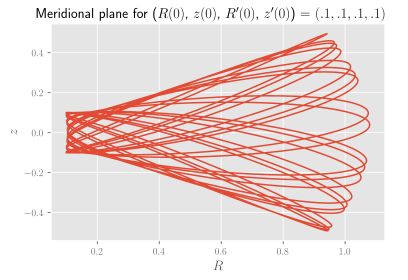

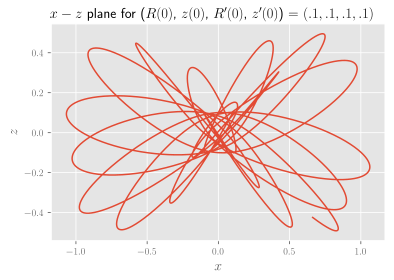

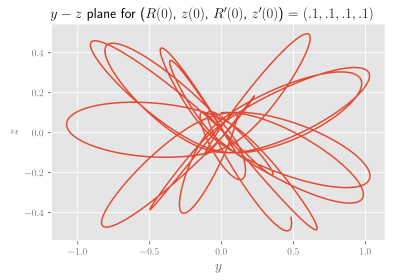

In [156]:
from scipy.integrate import odeint

def func(U, t, q, Lz): # make derivative vector for z and R
    R, z, Rp, zp = U[0], U[1], U[2], U[3]
    Rpp = (Lz*Lz/(R*R*R)) - (q*q*R/(q*q*R*R + z*z)) # d2R/dt2
    zpp = -1*z/(q*q*R*R + z*z) # d2z/dt2
    return [Rp, zp, Rpp, zpp]

q = .9 # set constants
Lz = .2

t = np.arange(0, 50, .01)
Us = odeint(func, np.array([.1, .1, .1, .1]), t, args=(q,Lz)) # solve
R, z, Rp, zp = Us[:,0], Us[:,1], Us[:,2], Us[:,3]

phip = Lz/(R*R) # d(phi)/dt

phi = scipy.integrate.cumtrapz(phip, t, initial=0) # position angle
x, xp = R*np.cos(phi), Rp*np.cos(phi) # x position and velocity
y, yp = R*np.sin(phi), Rp*np.sin(phi) # y position and velocity

fig = plt.figure() # plot
plt.plot(R, z)
plt.xlabel("$R$", fontsize = 14)
plt.ylabel("$z$", fontsize = 14)
plt.title("Meridional plane for ($R(0)$, $z(0)$, $R'(0)$, $z'(0)$) = $(.1, .1, .1, .1)$")
plt.show()

fig = plt.figure() # plot
plt.plot(x, z)
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$z$", fontsize = 14)
plt.title("$x-z$ plane for ($R(0)$, $z(0)$, $R'(0)$, $z'(0)$) = $(.1, .1, .1, .1)$")
plt.show()

fig = plt.figure() # plot
plt.plot(y, z)
plt.xlabel("$y$", fontsize = 14)
plt.ylabel("$z$", fontsize = 14)
plt.title("$y-z$ plane for ($R(0)$, $z(0)$, $R'(0)$, $z'(0)$) = $(.1, .1, .1, .1)$")
plt.show()

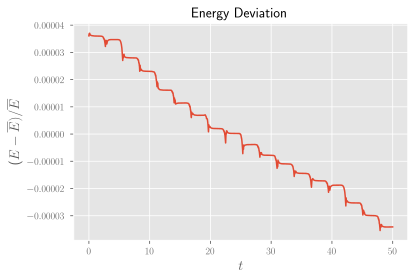

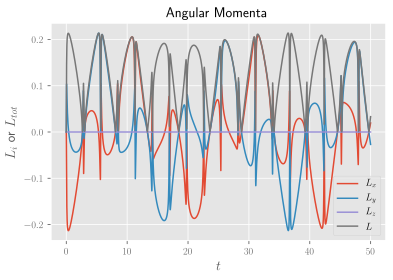

In [157]:
Us = odeint(func, np.array([.1, .1, .1, .1]), np.arange(0, 50, .01), args=(q,Lz))
R, z, Rp, zp = Us[:,0], Us[:,1], Us[:,2], Us[:,3]

def phi_eff(R, z, q, Lz): # effective potential
    return .5*np.log(R*R + (z*z)/(q*q)) + Lz*Lz/(2*R*R)

fig = plt.figure()
phis = phi_eff(R, z, q, Lz) 
E = phis + .5*(Rp*Rp + zp*zp) # energy from Hamiltonian
E_mean = np.mean(E) # mean
ts = np.arange(0, 50, .01)
plt.plot(ts, (E-E_mean)/E_mean) # deviation
plt.ylabel("($E - \overline{E})/\overline{E}$", fontsize = 14)
plt.xlabel("$t$", fontsize = 14)
plt.title("Energy Deviation")
plt.show()

Lx = y*zp - z*yp # angular momenta
Ly = z*xp - x*zp
Lz = x*yp - y*xp
L = np.sqrt(Lx*Lx + Ly*Ly + Lz*Lz) # total L

fig=plt.figure()
plt.plot(t, Lx, label = "$L_{x}$")
plt.plot(t, Ly,label = "$L_{y}$")
plt.plot(t, Lz, label = "$L_{z}$")
plt.plot(t, L, label = "$L$")
plt.ylabel("$L_{i}$ or $L_{tot}$", fontsize = 14)
plt.title("Angular Momenta")
plt.xlabel("$t$", fontsize = 14)
plt.legend()
plt.show()

We see that the energy is generally conserved from the numerical routine, and that $L_{z}$ is the only form of angular momentum that is conserved. We plot orbits for different initial conditions as well:

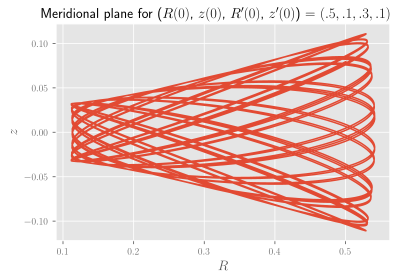

In [159]:
fig = plt.figure()
Us = odeint(func, np.array([.5, .1, .3, .1]), np.arange(0, 50, .01), args=(q,.2))
plt.plot(Us[:,0], Us[:,1])
plt.xlabel("$R$", fontsize = 14)
plt.ylabel("$z$", fontsize = 14)
plt.title("Meridional plane for ($R(0)$, $z(0)$, $R'(0)$, $z'(0)$) = $(.5, .1, .3, .1)$")
plt.show()

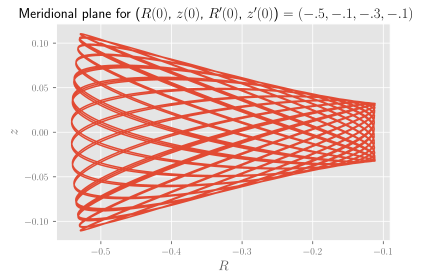

In [160]:
fig = plt.figure()
Us = odeint(func, np.array([-.5, .1, .3, -.1]), np.arange(0, 50, .01), args=(q,.2))
plt.plot(Us[:,0], Us[:,1])
plt.xlabel("$R$", fontsize = 14)
plt.ylabel("$z$", fontsize = 14)
plt.title("Meridional plane for ($R(0)$, $z(0)$, $R'(0)$, $z'(0)$) = $(-.5, -.1, -.3, -.1)$")
plt.show()

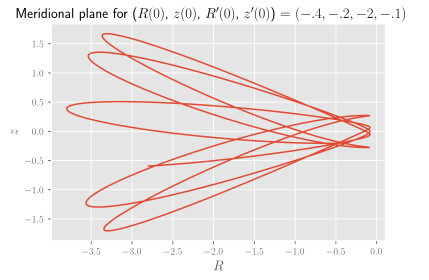

In [161]:
fig = plt.figure()
Us = odeint(func, np.array([-.4, -.2, -2, -.1]), np.arange(0, 50, .01), args=(q,.2))
plt.plot(Us[:,0], Us[:,1])
plt.xlabel("$R$", fontsize = 14)
plt.ylabel("$z$", fontsize = 14)
plt.title("Meridional plane for ($R(0)$, $z(0)$, $R'(0)$, $z'(0)$) = $(-.4, -.2, -2, -.1)$")
plt.show()